# Experiment 1 - Clustering

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)

## Preprocess
- Load the data and initialize the Doc corpus

In [1]:
from utils import Doc, read_filtered

all_lyrics = read_filtered()
dev_lyrics = all_lyrics[:500]
test_lyrics = all_lyrics[:10000]

Model loaded succeed


In [2]:
Doc.load_corpus(dev_lyrics)

Loading 0.00%
Loading 10.00%
Loading 20.00%
Loading 30.00%
Loading 40.00%
Loading 50.00%
Loading 60.00%
Loading 70.00%
Loading 80.00%
Loading 90.00%
Loading complete
Filtering out frequent and rare words.
Complete 
Vocab size 8660
Filtered 1.80% too short.


## Document embedded as bag of words
- Use pretrained word vector 

##### Looking for the most silimar lyric in the corpus

In [4]:
print(Doc('毛主席').most_similar())

山丹丹开花红艳艳版
阿宝
梦想音乐节 第期
珍妮
山丹丹开花红艳艳版  阿宝
词李若冰关鹤岩徐锁冯福宽
曲刘烽
一道道的那个山来哟一道道那水
咱们中央那个红军到陕北
一杆杆的那个红旗哟一杆杆枪
咱们的队伍呀势力壮
千家万户哎咳哎咳哟
把门儿开 哎咳哎咳哟
快把咱亲人迎进来
咿儿呀儿来吧哟喂
围定亲人 哎咳哎咳哟
热炕上坐 哎咳哎咳哟
知心的话儿飞出心窝窝
咿儿呀儿来吧哟喂
山丹丹的那个开花哟红艳艳
毛主席领导咱打江山
山丹丹的那个开花哟红个艳艳
毛主席领导咱打江山
毛主席领导咱打江山
毛主席领导咱打江山


##### Show the embeddings of the whole corpus

In [5]:
from sklearn.manifold import TSNE

X = np.zeros([len(Doc.corpus[:3000]), 512])
for i, doc in enumerate(Doc.corpus[:3000]):
    X[i] = doc.to_vec()

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(491, 2)

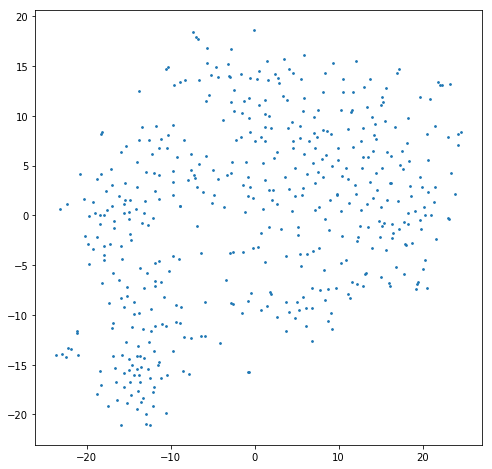

In [6]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=3)
plt.show()

##### Lines embedding in one piece of lyric

In [7]:
sample_n = 5

sampled = np.random.choice(Doc.corpus, sample_n)

seg = [0]
for i, doc in enumerate(sampled):
    seg.append(seg[i] + len(doc.children))

X = np.zeros([seg[-1], 512])
i = 0
for doc in sampled:
    for child in doc.children:
        X[i] = child.to_vec()
        i += 1

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(193, 2)

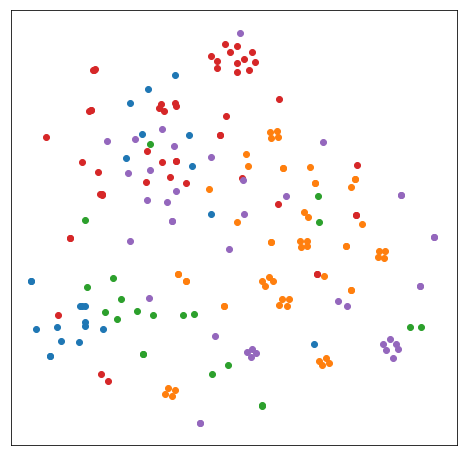

In [8]:
for i in range(sample_n):
    plt.xticks([],[])
    plt.yticks([],[])

    plt.scatter(X_embedded[seg[i]:seg[i+1], 0], X_embedded[seg[i]:seg[i+1], 1])

plt.show()

##### Similarity matrix of lines in sampled_n lyrics

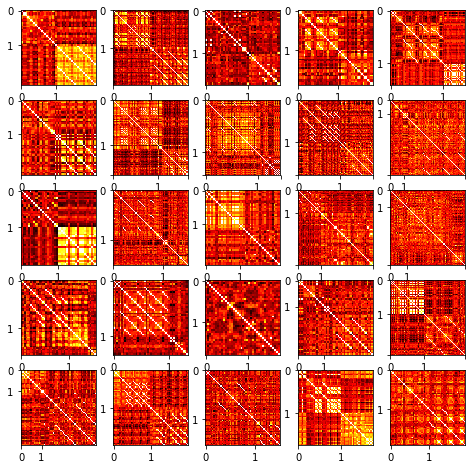

In [9]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    
    sample_n = 2

    sampled = np.random.choice(Doc.corpus, sample_n)

    seg = [0]
    for i, doc in enumerate(sampled):
        seg.append(seg[i] + len(doc.children))

    X = np.zeros([seg[-1], 512])
    i = 0
    for doc in sampled:
        for child in doc.children:
            X[i] = child.to_vec()
            i += 1

    plt.xticks(seg, range(sample_n))
    plt.yticks(seg, range(sample_n))
    plt.imshow(X.dot(X.T), cmap='hot')

## Trying to find topic

In [10]:
from topic import lda, find_topic

In [11]:
ldamodel = lda([doc.bag for doc in Doc.corpus], 10)

In [12]:
ldamodel.print_topics(10, 20)

[(0,
  '0.007*"味道" + 0.006*"陌生" + 0.005*"姑娘" + 0.005*"走过" + 0.004*"中国" + 0.004*"草原" + 0.004*"全部" + 0.003*"力量" + 0.003*"里面" + 0.003*"老天爷" + 0.003*"应该" + 0.003*"那个" + 0.003*"想起" + 0.003*"圣王" + 0.003*"无情" + 0.003*"安静" + 0.003*"音乐" + 0.003*"蓝天" + 0.003*"供养" + 0.003*"用尽"'),
 (1,
  '0.007*"何必" + 0.006*"春天" + 0.005*"礼物" + 0.005*"精彩" + 0.005*"以为" + 0.005*"私奔" + 0.004*"那些" + 0.004*"歪妇" + 0.004*"故事" + 0.004*"难道" + 0.004*"以前" + 0.004*"名义" + 0.003*"伤害" + 0.003*"每个" + 0.003*"手中" + 0.003*"期待" + 0.003*"错过" + 0.003*"无法" + 0.003*"岁月" + 0.003*"孤独"'),
 (2,
  '0.011*"玫瑰" + 0.005*"继续" + 0.004*"沉默" + 0.004*"说什" + 0.004*"注定" + 0.003*"从前" + 0.003*"只有" + 0.003*"遗忘" + 0.003*"配角" + 0.003*"怎样" + 0.003*"默默" + 0.003*"听到" + 0.002*"别人" + 0.002*"海鸥" + 0.002*"承受" + 0.002*"青天" + 0.002*"怀念" + 0.002*"星星" + 0.002*"那些" + 0.002*"有些"'),
 (3,
  '0.022*"亲爱" + 0.012*"唔准" + 0.008*"马上" + 0.006*"女人" + 0.005*"男人" + 0.004*"匆匆" + 0.004*"再见" + 0.004*"马年" + 0.004*"流泪" + 0.003*"许多" + 0.003*"日本" + 0.003*"放弃" + 0.003*"计划" + 0.003*"想起" + 0.

In [13]:
print(find_topic([doc.text for doc in Doc.corpus],"nmf",20, vec_model = "tfidf"))

Topic 0:一下 | 一刻 | 一千 | 一半 | 一向 | 一定 | 一无所有 | 一路顺风 | 一阵阵 | 上帝 | 下降 | 下雨 | 不加思索 | 不可思议 | 不好意思 | 不遗余力 | 丑陋 | 专注 | 专辑 | 丛浩 | 个个 | 中眼 | 为着 | 主题 | 之中 | 乐于 | 乔洋 | 习惯 | 云看 | 交易 | 交替 | 交织 | 交缠 | 亲吻 | 仁慈 | 今夏 | 今天 | 从未 | 仓促 | 他们 | 付出 | 付威 | 代表 | 仰望 | 任何 | 任性 | 企图 | 优雅 | 伟大 | 伤口 | 伤害 | 伤痛 | 伴侣 | 伴唱 | 似生生 | 但是 | 位置 | 低头 | 体贴 | 何苦 | 你们 | 你死我活 | 依旧 | 依赖 | 保留 | 信传 | 信徒 | 借口 | 值得 | 倾泄 | 假若 | 停下 | 停顿 | 偶像剧 | 傍晚 | 储存 | 傻以为 | 傻眼 | 儿讲 | 充满 | 光明 | 全世界 | 全假 | 全新 | 全部 | 公主 | 公司 | 兴奋 | 再次 | 再说 | 冒险 | 冤枉路 | 冲破 | 冷冰冰 | 冷淡 | 冷清 | 冷漠 | 几许 | 凭空 | 凶手 | 出口 | 分手 | 分析 | 分钟 | 分隔 | 初吻 | 删除 | 别怕 | 制作 | 刻苦 | 前往 | 加速 | 动物 | 努力 | 勇敢者 | 勇气 | 勾勾 | 包围 | 包袱 | 匆匆 | 北方 | 十二 | 十数 | 午夜 | 半瞬 | 半身 | 半边 | 华丽 | 即使 | 历久弥新 | 原因 | 原点 | 原谅 | 参加 | 参赛者 | 双鱼 | 反正 | 发悄悄 | 发行 | 受伤 | 变化 | 变尖 | 变幻 | 只是 | 只有 | 可怕 | 可悲 | 可惜 | 可是 | 可笑 | 台北 | 吃亏 | 各自 | 合就算 | 合能 | 合衬 | 吉他 | 吉时雨 | 同行 | 吴奇隆 | 吸引 | 告诉 | 周笔 | 命中注定 | 命令 | 命运 | 哑忍 | 哭泣 | 唱歌 | 唱片 | 喜欢 | 喜波 | 嘘寒问暖 | 嘱託 | 嘴脸 | 回缘 | 回顾 | 因果 | 因此 | 在乎 | 在意 | 在所不惜 | 地互 | 坚定 | 坚强 | 坦然 | 城府 | 堤坝 | 填词 | 声线 | 声音 | 复杂